1.	Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,q2).

Вариант 20
	Параметры для нормального распределения (-5;4)
    n = 145	
    q = 1,95	
    k = 5	
    Правила для расчета числа интервалов группировки: Скотта	
    Закон распределения случайно величины случайноq величины Y:  Экспоненциальное с математическим ожиданием, равным 5


In [177]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Normal')

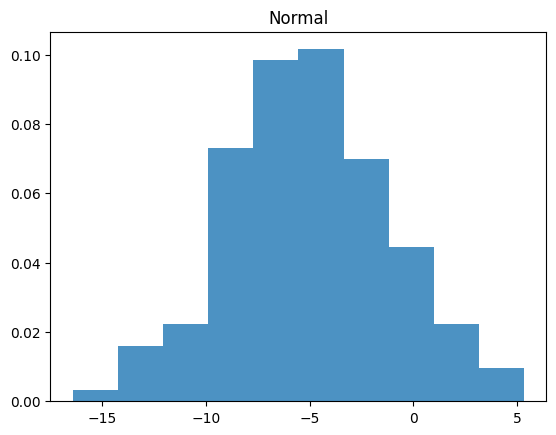

In [260]:
a = -5
sigma = 4
n_points = 145 
sample = sts.norm.rvs(loc=a,scale=sigma, size=n_points)
sample_50x = sts.norm.rvs(loc=a,scale=sigma, size=n_points*50)
plt.hist(sample, density=True, histtype='stepfilled',alpha=0.8)
plt.title('Normal')

In [197]:
#print(sample)

[ -9.47776205  -3.82834286 -11.05625066  -1.95068753  -8.80963253
  -4.88047041  -0.36106206  -8.3507675   -0.26382027  -8.4404184
  -6.28068251 -11.8823731   -5.84171221   1.33411513 -12.05285956
  -0.38078022  -5.47766049  -4.54407657  -2.50449734 -11.30520914
  -5.5801874    2.92578932  -2.65925943  -3.42283129  -7.35861182
  -6.54878746  -3.63271966 -11.93994855  -3.02206766  -4.75211577
  -5.03427432  -4.75608698  -9.52807938  -8.7687873   -6.48731203
  -6.09382627  -4.61420416   2.01495941  -5.77031379 -13.37497403
  -5.26625339  -3.80284902  -6.34873892  -6.7130135   -5.2737191
  -6.57102904  -2.5577673   -4.67376617  -2.57995111  -5.19745937
  -4.20075957 -13.11342975  -0.78428909  -3.53696889  -0.94700683
  -6.56540304  -4.37832926  -6.02725792  -3.47257248  -6.72009385
  -4.087998   -13.56696771  -3.60823777  -4.94581894  -6.03545351
 -11.87705669  -8.29014482  -3.16667183  -1.06579197  -8.6307605
  -1.11136263  -7.14147766  -3.13700924  -6.7442683   -0.94954676
  -8.36367059

1.1.	Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом Скотта. Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот.

ширина интервала по правилу Скотта: w = 3.5 * σ / n^(1/3)

In [208]:
width = 3.5 * sigma /pow(n_points,1/3)
count_interval = int((sample.max()-sample.min())/width)+1
print(f'ширина интервалов {width}\nколичество интервалов {count_interval}\nминимальный элемент {sample.min()}\nмаксимальный элемент {sample.max()}')
intervals = []
for i in range(0, count_interval):
    print(f'{i+1} interval: {sample.min()+i*width} - {sample.min()+(i+1)*width}')
    intervals.append(sample.min()+i*width)
intervals.append(sample.min()+count_interval*width)


ширина интервалов 2.6648454998349167
количество интервалов 9
минимальный элемент -15.256943072699787
максимальный элемент 6.530556355644082
1 interval: -15.256943072699787 - -12.592097572864871
2 interval: -12.592097572864871 - -9.927252073029955
3 interval: -9.927252073029955 - -7.262406573195037
4 interval: -7.262406573195037 - -4.59756107336012
5 interval: -4.59756107336012 - -1.9327155735252042
6 interval: -1.9327155735252042 - 0.7321299263097139
7 interval: 0.7321299263097139 - 3.3969754261446283
8 interval: 3.3969754261446283 - 6.061820925979546
9 interval: 6.061820925979546 - 8.726666425814464


1 interval: 4
2 interval: 7
3 interval: 26
4 interval: 40
5 interval: 32
6 interval: 24
7 interval: 9
8 interval: 1
9 interval: 2

Сумма частот - 145


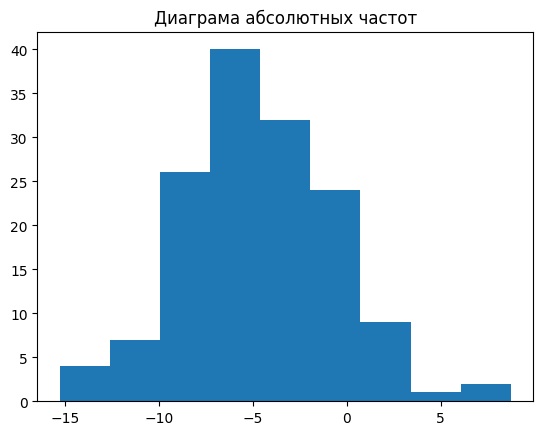

In [210]:
frequency = []
summ = 0
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in sample:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
    print(f'{i+1} interval: {frequency[i]}')
    summ += frequency[i]

print(f'\nСумма частот - {summ}')
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)


1.2.	Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот. X (причем гистограмму и кривую распределения разместить на одном рисунке).

1 interval: 0.010351897285700297
2 interval: 0.01811582024997552
3 interval: 0.06728733235705193
4 interval: 0.10351897285700297
5 interval: 0.08281517828560238
6 interval: 0.06211138371420178
7 interval: 0.02329176889282567
8 interval: 0.0025879743214250743
9 interval: 0.005175948642850149
1.0000000000000002


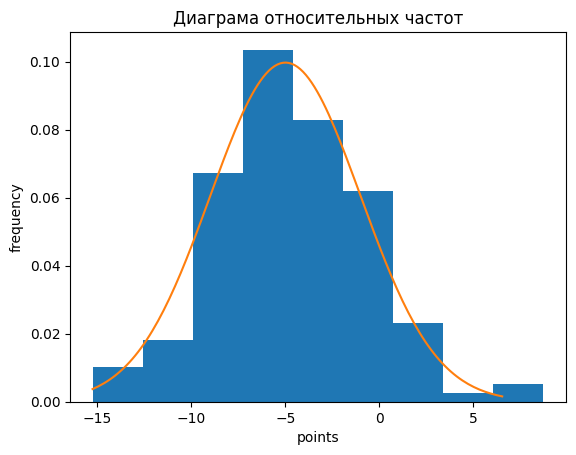

In [221]:
frequency = np.array(frequency)
my_pdf = frequency/(width*n_points)
summ = 0
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
    summ += my_pdf[i]
plt.stairs(my_pdf, intervals, fill=True)
print(summ*width)
## мы нашли интервальный ряд относительных частот



x = np.linspace(sample.min(), sample.max(), 145)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Диаграма относительных частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()
proof = 0 

2.2.	Построить гистограмму абсолютных и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

9 9


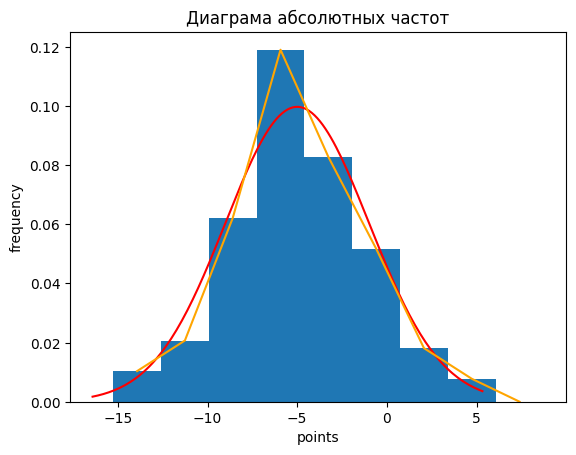

In [268]:
frequency = []
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in sample:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
    frequency[i] = frequency[i] / (n_points * width)


plt.stairs(frequency, intervals, fill=True)


x = np.linspace(sample.min(), sample.max(), 145)
plt.plot(x, sts.norm.pdf(x, a, sigma), color="red")

axes_X = []
for i in range(0, len(intervals)-1):
    axes_X.append(intervals[i]+(width /2))
print(len(axes_X), len(frequency))
plt.plot(axes_X, frequency, color="orange", label='Эмпирическая функция')


plt.title("Диаграма абсолютных частот")
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()
proof = 0 

2.3.	Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

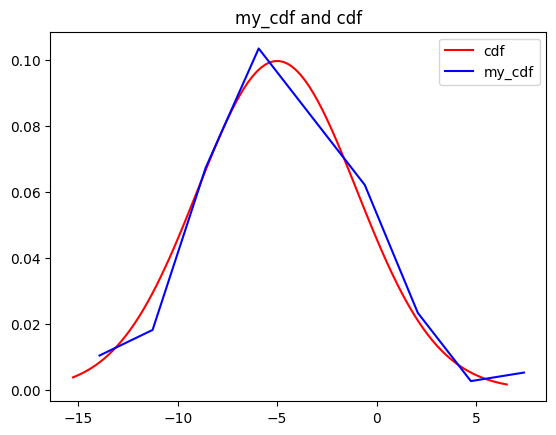

In [245]:
#теоритическая функция распределения случ величины х
axes_X = []
for i in range(0, len(intervals)-1):
    axes_X.append(intervals[i]+(width /2))

y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-a)**2 / (2*sigma**2)) 
plt.plot(x, y,  color="red", label='Теоретическая кривая')
#График эмперической функции распределения
plt.plot(axes_X, frequency, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

2.4.	Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

In [185]:
from scipy.stats import norm
import pandas as pd
import math

        sample
0.25 -7.278789
0.50 -4.870691
0.75 -1.940111
Вероятность по lib 0.9488238809567229


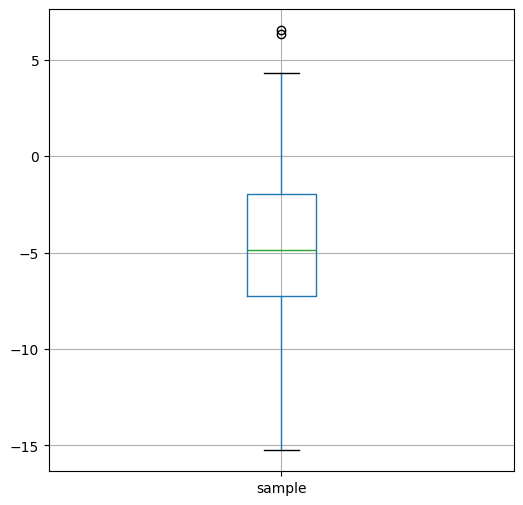

In [246]:
q = 1.95
k = 5	
df = pd.DataFrame(data=sample,columns=['sample'])
df.boxplot(figsize = (6, 6))
df.quantile([0.25,0.5,0.75])
print(df.quantile([0.25,0.5,0.75]))
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")


3.	Используя таблицу значений функции Лапласа, найти вероятность 
(вычисления вероятности сделать “вручную” )
P(|X-MX|<q)                                            


In [247]:
print(q)
# по таблице получим
print("Вероятность, сделанная \"вручную\": ", 0.4744 * 2)

1.95
Вероятность, сделанная "вручную":  0.9488


Найти вероятность (выше), используя встроенные функции Python.

In [250]:

print("Вероятность по lib", sts.norm().cdf(q)-sts.norm().cdf(-q))



Вероятность по lib 0.9488238809567229


Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 

In [249]:
satisfying_values = 0
# найдем все значения выборки, подходящие по усл-ю
for i in sample:
    if abs(i - a) < q * sigma:
        satisfying_values += 1
        
# найдем отн. частоту
rel_freq = satisfying_values / n_points
print("Статистическая", rel_freq)

Статистическая 0.9517241379310345


3.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).
-- Точность увеличится

.Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами

In [263]:
#c помощью функций
import statistics

mean = statistics.mean(sample)
print("Мат ожидание ", mean)

variacne = statistics.variance(sample)
print("Дисперсия", variacne)

deviation = math.sqrt(variacne)
print("стандартное отклонение", deviation)
 
skewness = sts.skew(sample)
print("Коэффициент асимметрии", skewness)

kurtosis = sts.kurtosis(sample)
print("Эксцесс", kurtosis)

Мат ожидание  -5.039727080585668
Дисперсия 15.6073066228985
стандартное отклонение 3.9506083864258805
Коэффициент асимметрии 0.07069817032530437
Эксцесс 0.05989046762177885


In [262]:
#первый способ
Mx = sample.sum()/n_points
print("Мат ожидание", Mx)

Dx = 0
for i in sample: 
    Dx += math.pow(i-Mx, 2)
Dx /= n_points
print("Диспресия:", Dx)

print("Стандартное отклонение", math.sqrt(Dx))

sum = 0
sum_2 = 0
for i in sample: 
    sum += math.pow(i-Mx,3)
    sum_2 += math.pow((i-Mx), 4)
m3 = sum / n_points
m4 = sum_2/ n_points
A = m3 / math.pow(math.sqrt(Dx), 3)
E = m4/math.pow(Dx, 2) - 3
print("Коэффициент ассимметрии", A)
print("Коэффициент эксцесса", E)


Мат ожидание -5.039727080585668
Диспресия: 15.4996700254992
Стандартное отклонение 3.9369620299793593
Коэффициент ассимметрии 0.07069817032530457
Коэффициент эксцесса 0.05989046762177974


In [269]:
# Увеличим объем выборки -> увеличим точность
mean = statistics.mean(sample_50x)
print("Мат ожидание ", mean)

variacne = statistics.variance(sample_50x)
print("Дисперсия", variacne)

deviation = math.sqrt(variacne)
print("стандартное отклонение", deviation)
 
skewness = sts.skew(sample)
print("Коэффициент асимметрии", skewness)

kurtosis = sts.kurtosis(sample_50x)
print("Эксцесс", kurtosis)

Мат ожидание  -5.023304530629757
Дисперсия 15.716723837302572
стандартное отклонение 3.9644323474241014
Коэффициент асимметрии 0.07069817032530437
Эксцесс -0.019990074076519537
